In [5]:
srcimgfolder="./datasets/refined_img/"

In [6]:
import cv2
import os
import pandas as pd
import numpy as np

# 폴더 경로 설정
folder_path = srcimgfolder


# RGB 색상 값을 16진수 색상 코드로 변환하는 함수
def rgb_to_hex(rgb):
    hex_code = "#{:02x}{:02x}{:02x}".format(int(rgb[0]), int(rgb[1]), int(rgb[2]))
    return hex_code

# 이미지에서 색상정보 추출 함수
def extract_colors(image, num_colors):
    # BGR 이미지를 RGB로 변환
    rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    # 이미지를 1차원 배열로 변환
    pixels = rgb_image.reshape(-1, 3)
    # K-means 알고리즘을 사용하여 주요 색상 클러스터링
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
    _, labels, centers = cv2.kmeans(pixels.astype(np.float32), num_colors, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
    # 추출된 색상 정보를 16진수 색상 코드로 변환
    hex_colors = [rgb_to_hex(color) for color in centers]
    return hex_colors

# 데이터프레임 생성을 위한 빈 리스트 생성
data = []

# 폴더 내 이미지 파일 순회
for filename in os.listdir(folder_path):
    if filename.endswith(".jpg") or filename.endswith(".png"):
        
        image_path = os.path.join(folder_path, filename)
        image = cv2.imread(image_path)
        colors = extract_colors(image, 6)
        data.append([filename, colors])
        print(filename)

# 데이터프레임 생성
df = pd.DataFrame(data,columns=["imgname","hexcode"])

# 결과 출력
print(df)


img_4299.jpg
img_4300.jpg
img_4301.jpg
        imgname                                            hexcode
0  img_4299.jpg  [#46373d, #070707, #f5d5b1, #f38d56, #9d524b, ...
1  img_4300.jpg  [#9d8a6d, #67604e, #6ab6fb, #92d4fc, #312d23, ...
2  img_4301.jpg  [#c0c2c5, #646f7e, #eaebeb, #62411c, #393a40, ...


In [7]:
df.to_csv("./datasets/dataset.csv")

numpy배열 색상표로 만들어보기

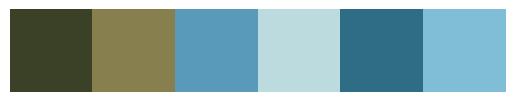

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

palette = np.array([[58, 65, 39],
                    [135, 127, 77],
                    [89, 154, 186],
                    [187, 219, 223],
                    [47, 108, 133],
                    [128, 189, 214]])

palette = palette[np.newaxis, :, :]  # 차원 추가: (6, 1, 3)

plt.imshow(palette)
plt.axis('off')
plt.show()
